In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

if torch.backends.mps.is_available():
  mps_device = torch.device("mps")
  print("MPS is available")
  torch.device(mps_device)
else:
  print("MPS is not available")

MPS is available


In [2]:
# Create Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) --> Hidden layer 1(number of neurons) --> Hidden layer 2(number of neurons) --> Output layer(3 classes)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) # fc - full connected
    self.fc2 = nn.Linear(h1, h2)
    self.out_put = nn.Linear(h2, out_features)
  
  def forward(self, x):
    x = F.relu(self.fc1(x)) # relu - rectified linear unit
    x = F.relu(self.fc2(x))
    x = self.out_put(x)
    return x

In [3]:
# Pick a manual seed for randomization

torch.manual_seed(41)

# Create a model instance

model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_stdlib_context

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
# Changing last column from strings to numbers

my_df['variety'] = my_df['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0.0, 1.0, 2.0])
my_df

/var/folders/p4/n6lzrhj13k389wx2_llnw_j00000gs/T/ipykernel_84480/2028126430.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace(['Setosa', 'Versicolor', 'Virginica'], [0.0, 1.0, 2.0])


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train Test Split, set x, y

X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [8]:
# Convert these to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# Convert these to tensors

torch.device('mps')

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(X_train, X_test, y_train, y_test)


criterion = nn.CrossEntropyLoss()

# Choose adam optimizer, lr - learning rate, if errors doesn't go after bunch of iterations(epochs), lower our learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.parameters()

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

<generator object Module.parameters at 0x330f7a880>

In [23]:
# Train our model!
# Epochs? (One run through all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
  # Go Forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results
  
  # Measure the loss / error, gonna be high at first
  loss = criterion(y_pred, y_train) # Get the loss

  # Kep track of the loss
  losses.append(loss.detach().numpy())
  
  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch {i}, Loss: {loss.item()}')
  # Zero out the gradients
  optimizer.zero_grad()

  # Back propagate the loss
  loss.backward()
  
  # Update the weights
  optimizer.step()


Epoch 0, Loss: 0.12227778881788254
Epoch 10, Loss: 0.12056920677423477
Epoch 20, Loss: 0.11891438066959381
Epoch 30, Loss: 0.11731109768152237
Epoch 40, Loss: 0.11575721204280853
Epoch 50, Loss: 0.11425081640481949
Epoch 60, Loss: 0.11278986185789108
Epoch 70, Loss: 0.11137291043996811
Epoch 80, Loss: 0.10999814420938492
Epoch 90, Loss: 0.10866356641054153


Text(0.5, 0, 'Epochs')

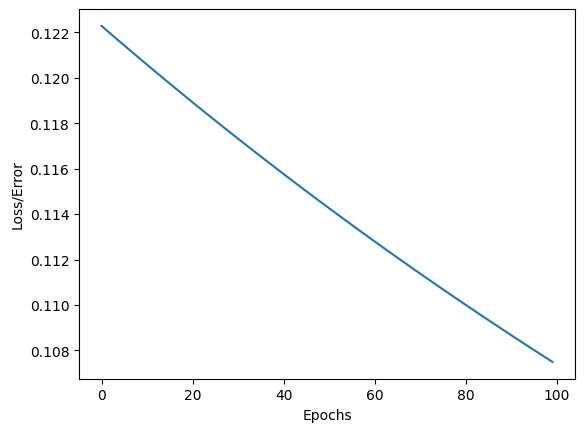

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')